#**Image Denoising**

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
<ipython-input-22-4112a2876bc5>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  binarized_img 

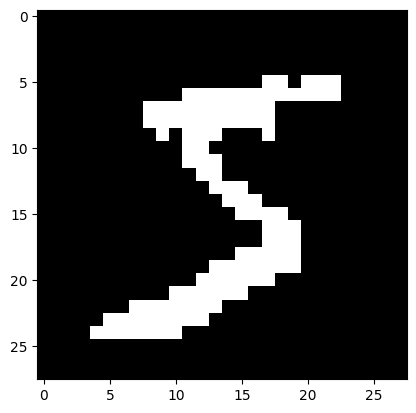

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml


x, _ = fetch_openml("mnist_784", return_X_y=True, as_frame=False)
x = x[0]
binarized_img = (x > 127).astype(np.int).reshape(28, 28)
plt.imshow(binarized_img, cmap="gray")

(28, 28)


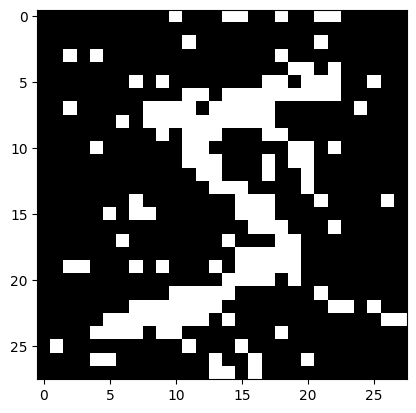

In [ ]:
print(binarized_img.shape)
noisy_binarized_img = np.ones_like(binarized_img)

ratio = 0.1

for i in range(0, 28):
  for j in range(0, 28):
    a = np.random.random(1)
    if (a < ratio):
      noisy_binarized_img[i][j] = 1 - binarized_img[i][j]
    else:
      noisy_binarized_img[i][j] = binarized_img[i][j]

plt.imshow(noisy_binarized_img, cmap="gray")

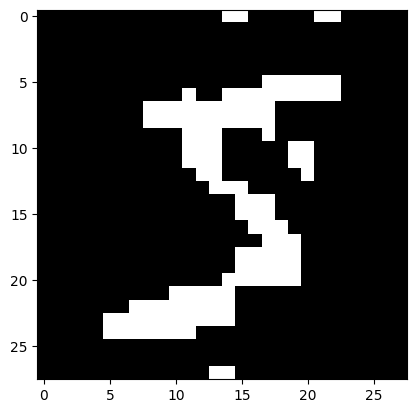

In [ ]:
beta = 1.0
eta = 2.1
h = 0

y = np.copy(noisy_binarized_img) * 2 - 1   # turn 0, 1 to 1, -1
x = np.copy(y)

def calcEnergy():
  E = 0

  for a in range(0, 28):
    for b in range(0, 28):
      xi = x[a][b]
      yi = y[a][b]
      E += h * xi

      if (a > 0):
        E += -beta * xi * x[a-1][b]
      if (b > 0):
        E += -beta * xi * x[a][b-1]
      if (a < 27):
        E += -beta * xi * x[a+1][b]
      if (b < 27):
        E += -beta * xi * x[a][b+1]

      E += -eta * xi * yi
  return E



for i in range(0, 28):
  for j in range(0, 28):
    originalE = calcEnergy()
    x[i][j] = -x[i][j]
    currentE = calcEnergy()

    if currentE > originalE:
      x[i][j] = -x[i][j]

x = (x + 1) // 2
plt.imshow(x, cmap="gray")